## **Quantum Computing for Option Pricing**


We invite you to explore and implement quantum computing techniques applied to the problem of financial option pricing. Looking for applications in the world of quantum finance is a challenging task. Derivate pricing is a key cornerstone of mathematical finance and one of the most ubiquitous complex calculations in finance. Some of the classical routines (Montecarlo and Finite differences methods) used to solve option pricing can be sped up with quantum computing methods, which is of great interest to the industry.


The history of pricing financial derivatives is a long and complex one. It began in the late 1970s, when the first derivatives were created. At the time, traders and investors sought to protect their assets from market volatility, and so began to use derivatives to hedge against risk. It led to the creation of the Black–Scholes or Black–Scholes–Merton model, a mathematical model for the dynamics of a financial market containing derivative investment instruments.

The challenge was that these derivatives were highly complex, and there was no reliable way to determine their worth. Traders and investors relied on intuition and experience, leaving them exposed to potential losses. This lack of clarity led to losses in the hundreds of millions of dollars.

In the 1980s, economists and mathematicians began to develop models to determine the price of derivatives. These models enabled traders and investors to calculate the fair market value of derivatives, reducing the risk of large losses.

Over time, these models became increasingly sophisticated. By the late 1990s, derivatives pricing models had become so complex that they required supercomputers to calculate. Today, the pricing of derivatives is an intricate process that requires a deep understanding of the underlying financial instruments and the markets in which they are traded.

#### Summary of the Challenge

The purpose of this challenge is to build and run quantum circuits that can be used to price an option by simulating the quantum imaginary time evolution of its price under certain dynamics (Black scholes equation). The challenge is suitable for NISQ devices and small scale quantum simulators as there is some degree of freedom as to how to represent the problem dimension.

The main ingredients in the challenge are:

- Implementing the main hybrid (quantum-classical) quantum algorithm on a simple but relevant financial model.
- Using the Black-Scholes formula for pricing options on stocks and other securities. 

The challenge consists of three blocks:

1. Build the correspoding quantum circuits of the hybrid algorithm
2. Price an european call option on a statevector simulator.
3. Extend the problem theoretically, by implementing an additional feature or running a hardware experiment.

#### Notes on evaluation

- Do not stress finishing all the steps as quick as possible. Take your time and understand the problem.  The assesment also takes into account the originality, quality, and presentation of you submission. 
- Add as many markdown or code cells as necessary to the notebook, ensure that everythin runs smoothly for ease of evaluation.
- Set up your own environment to work on the jupyter notebook. You will need qiskit  and the usual imports (numpy,matplotlib, etc.)
- If you have any questions or concerns, please contact the organizers, Qiskit mentors or the slack channel set up for the hackathon.

#### Background information

Analyzing the problem of option pricing from the point of view of physics brings a whole collection of new concepts to the field of mathematical finance as well as adds to it a set of powerful computational techniques. A useful way to visualize this link is to imagine the price of an option is a wavefunction that goes through the dynamics of time evolution.


### **Partial Differential equation and quantum algorithms**

Partial differential equations (PDEs) are fundamental to solving important problems in disciplines ranging from heat and mass transfer, fluid dynamics and electromagnetics to quantitative finance and human behavior. Finding new methods to solve PDEs more efficiently—including making use of new algorithms or new types of hardware—has been an active area of research.

Recently, the advent of quantum computers and the invention of new quantum algorithms have provided a novel paradigm for solving PDEs. A cornerstone of many of these quantum algorithms is the seminal Harrow-Hassidim-Lloyd (HHL) algorithm for solving linear systems of eqautions, which can be utilized to solve PDEs by discretizing the spatial variable of the  PDE and mapping it to a system of linear equations or an ordinary differential equations (ODEs). Compared to classical algorithms, the HHL algorithm can be shown to exhibit an exponential speedup. Unfortunately, the HHL algorithm works only in an idealized setting, and a list of caveats must be addressed before it can be used to realize a quantum advantage


Another promising set of techniques, originating from computational chemistry, are quantum simulation techniques. There is vast literature on quantum or hamiltonian simulation techniques, but particularly we are interested on near-term computation, hence variational based methods can offer a heuristic way to explore quantum PDE solvers.


We first revisit some concepts to have a better understanding of how each of the pieces fits into the puzzle. Then the challenge starts!

### **The Black scholes model**

Black-Scholes, or sometimes Black-Scholes-Merton, is a mathematical model used to explain the behavior of financial derivatives, most commonly options. It was proposed by Black and Scholes in 1973. Option prices can be modeled under the BS framework, finding applications in portfolio risk hedging or implied volatility learning. From the model we are able to calculate what the price of an option should be,  based on a number of different factors. Nowadays there are numerous variations of the Black-Scholes model, each of which seeks to improve the model based on certain criteria, usually at the cost of a significant increase in complexity. T following points summarize the assumptions of the BS model:

Deriving the PDE form of the BS model involves a bit of work, so we leave this open for the interested hacker, but a good starting point should be the Feynman–Kac theorem. The Feynman-Kac
formula connects stochastic differential equations (SDEs), which describe the evolution of random variables such as stock prices, to parabolic (second-order, linear) partial differential equations (PDEs)


The Black-Scholes PDE solution describes the price of an option over time:

$$\frac{\partial \mathrm C}{ \partial \mathrm t } + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm C}{\partial \mathrm C^2}
+ \mathrm r \mathrm S \frac{\partial \mathrm C}{\partial \mathrm S}\ =
\mathrm r \mathrm C $$

To uniquely specify the problem (i.e the value of an option), we must prescribe boundary conditions (usually at S=0 and S = $\infty$) and initial/final condtions at $t=0$ and $t=T$, respectively. 
For example, for an european vanilla call option:

$$
C(0,t) = 0, \hspace{4pt} C(S_{\max},t)=S_{\max} - K e^{-r(T-t)}, \hspace{10pt} 0 \leq t \leq T
$$

The final condition ($t=T$, expiry time of the option) is usually specified by the pay-off function, since the BS is solved backwards in time (indeed, we are interested on the $t=0$ of the option price):

$$
C(S,T) = \max(S-K,0), \hspace{10pt} 0 \leq S \leq S_{\max}
$$


An explicit analytical solution for the pricing of the European call (or put) option exists, but for other types of financial options may not exist. More often than not, these asset pricing models
are multi-dimensional and complex, as a consequence of which, one does not have closed-form solution. Nonetheless, it provides a ground for obtaining new numerical methods for the pricing of options.

The BSM model makes very strict assumptions about the price process and we simplify greatly our model of price formation. We have to write down some prices process for any model but in reality the data generating process for stock prices is unknown and we feel intuitively that securities valuation is a complex problem.

**Summary of parameters**

- C = Call option price 
- S = Current stock price
- K = Strike price of the option
- r = risk-free interest rate (a number between 0 and 1)
- $\sigma$ = volatility of the stocks return (a number between 0 and 1)
- T = time to option maturity (in years)

### **Variational quantum imaginary time evolution**


**1. Quantum simulation**

Let $\psi$ describe the quantum state of a physical system. $\psi$ may be a vector or a function. 

The Schr&ouml;dinger equation tells us that the time evolution of $\psi$ is given by
$$
i\hbar\frac{\partial}{\partial t}\psi(t) = H\psi(t),
$$
where H is the <a href='https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)'>Hamiltonian operator</a> of the system. If \(H\) is time-independent, then
$$
\psi(t) = \exp\left(-\frac{i}{\hbar}tH\right)\psi(0).
$$
The operator $\exp\left(-\frac{i}{\hbar}tH\right)$ is a <a href='https://en.wikipedia.org/wiki/Unitary_operator'>unitary operator</a>.</p>

A consequence of the Schr&ouml;dinger equation is that starting from a quantum state  $|\psi(0)\rangle$, it is possible to obtain a specific quantum state $\psi_1$ by evolving the system with the appropriate Hamiltonian for a suitable period of time.

**2. Quantum imaginary time evolution**

The corresponding propagator in
imaginary time, $\tau = it$ We note that while the real time propagator is a unitary operator, the imaginary time propagator is not.
$$
\exp(-\tau H)|\psi\rangle
$$

It is impossible to decompose it into a sequence of unitary gates, and thus directly realise it
with a quantum circuit. 

Algorithms can be broadly classified into two categories; those that approximately implement the evolution operator $\exp(-iHt)$ (“decomposition methods”) and those that aim to variationally approximate the time-evolved state $|\psi(t)\rangle$ directly.

Sam McArdle et al proposed a hybrid, variational algortihm for simulating imaginary time evolution on a quantum computer, called **varQITE**. You can find more details on here: https://arxiv.org/pdf/1804.03023.pdf

Focusing on systems described by hamiltonians of the form $\sum_{n=1}^{N} \lambda_{i}h_{i}$. Given an initial state , the normalized imaginary time evolution is defined by:

$|\psi(\tau)\rangle = A(\tau)e^{-H\tau}|\psi(0)\rangle$

where $A(\tau) = \frac{1}{\sqrt{\langle\psi(0)|e^{-2H\tau}|\psi(0)\rangle}}$ is the normalization factor.


VarQITE is an algorithm to approximate QITE. Instead of evolving quantum states in the complete exponential state space, a parameterized ansatz
is used and the evolution is approximated by mapping it to the ansatz parameters via McLachlan’s variational principle.

MacLachlan's variational principle is given by
$$
\delta \|\left(\partial / \partial t+H-E_\tau\right)|\phi(t)\rangle \|=0
$$


Instead of directly calculating the state $|\psi(\tau)\rangle$, we approximate it using an $N$-dimensional variational circuit made up of parameters $\boldsymbol{\theta}(\tau)=\left\{\theta_1, \theta_2 \ldots \theta_N\right\}$ giving us $|\psi(\tau)\rangle \approx\left|\psi\left(\boldsymbol{\theta}_N(\tau)\right)\right\rangle$, using a variational quantum circuit. Thus our entire circuit can be written as $|\psi(\boldsymbol{\theta}(0))\rangle=V(\boldsymbol{\theta}(0))|0\rangle$. We start by variationally finding $\boldsymbol{\theta}(0)$ that best approximates our initial condition $|\psi(0)\rangle$. We then use MacLachlan's variational principle to translate the time propagation of state $|\psi(\tau)\rangle$ to time evolve the variational vector $\boldsymbol{\theta}(\tau)$, which in turn propagates $|\psi\rangle$.

It finds use cases in a variety of topics:
-   Ground-state cooling (chemistry, optimization)
-   Quantum Gibbs-state samplers
-   Quantum Lanczos
-   **Steady state evolution for quantum PDE solvers**



### **The Black-Scholes Hamiltonian for an European call option**

We can establish a similarity between the BS-PDE and the Schrodinger equation by doing some clever transformations, By uncovering this connection, we are now able to use techniques from the world of quantum such as the alluded above method: **QITE**. The need to perform hamiltonian evolution on the imaginary axis is described below.



First, let's establish a series of transformations that would simplify the BS-PDE. By applying two rounds of changes of variables: 


1. $S=e^{x}$ and $\tau =\sigma^{2}(T-t)$

We transformed PDE, originally stated in the BS section, now into the $x$ and $\tau$ space:

$\left(-\sigma^2 \partial_\tau+\left(r-\frac{1}{2} \sigma^2\right) \partial_x+\frac{1}{2} \sigma^2 \partial_{x x}-r\right) V(\tau, x)=0$

Then:

2. $V(\tau, x)=e^{a x+b \tau} u(\tau, x)$

We get to something that looks very similar to the heat equation:
$$
\partial_\tau u(\tau, x)=\frac{1}{2} \partial_{x x} u(\tau, x)
$$
on $\left(0, \sigma^2 T\right] \times \mathbb{R}$, with boundary condition $u(0, x)=\mathrm{e}^{-a x} f\left(\mathrm{e}^x\right)$, where with $a=\frac{1}{2}-\frac{r}{\sigma^2}, b=-\frac{1}{2}\left(\frac{1}{2}-\frac{r}{\sigma^2}\right)^2-\frac{r}{\sigma^2}$.


There is a small caveat though, the "heat" equation of above is missing the imaginary axis to be a linear Schrondiger equation. It is mising a wick rotation. A simple tool that allows us , in short, to use QITE techniques that are able to simulate wick rotated propagation or evolution, which can be very expensive with classical CPU methods.

The Wick rotation $\xi=-\mathrm{i} \tau$ transforms  $\partial_\tau u(\tau, x)=\frac{1}{2} \partial_{x x} u(\tau, x)$ into $-\mathrm{i} \partial_{\xi} u(\xi, x)=\frac{1}{2} \partial_{x x} u(\xi, x)$, or, in the quantum computing language, also called braket or dirac notation, we have the Schrodinger equation:
$$
-\mathrm{i} \frac{\partial}{\partial \xi}|\psi\rangle=\widehat{\mathcal{H}}|\psi\rangle,
$$
where the quantum state $|\psi\rangle$ ) plays the role of the modified price $u(\cdot, \cdot)$, while the Hamiltonian operator is here $\widehat{\mathcal{H}}=\frac{1}{2} \partial_{x x}$. For this special case of a time-independent Hamiltonian:
$$
|\psi(\xi)\rangle=\exp (\mathrm{i} \widehat{\mathcal{H}} \xi)|\psi(0)\rangle
$$

Then, we can resort to QITE techniques to do wick rotated imaginary time evolution.

Inside the challenge, you will have to build the $H_{BS} = \widehat{\mathcal{H}}=\frac{1}{2} \partial_{x x}$ matrix.

### **References**

These references deal with the problem at hand and can be helpful to consult:
- Quantum option pricing using Wick rotated imaginary time evolution: https://arxiv.org/pdf/2101.04280.pdf
- A quantum algorithm for linear PDES arising in finance: https://arxiv.org/pdf/1912.02753.pdf


### **Black scholes model parameters and basic imports**
Import any qiskit functionality you need!

## **Challenge**
We start with encoding the initial boundary conditions of the option price into initial quantum state, and then evolve it with the Hamiltonian corresponding to the pricing method in imaginary time:

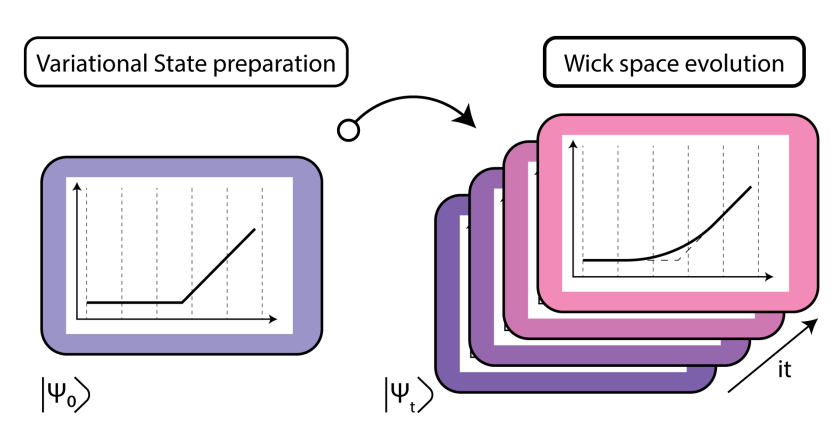

### **Step 1**: Build the ansatz circuit and the hamiltonian

- **Ansatz circuit**: Must accept a vector of parameters given a certain layer depth. Only single parameter per gate is allowed. The example below has 2 layers, starting exactly after the first layer of RY rotations.
  
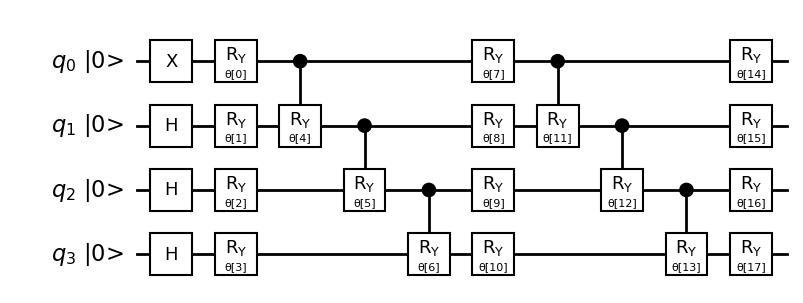

- **Hamiltonian operator**: Create the differential operator (second-order centered differences) and decompose into pauli operators $\sum_{n=1}^{N} \lambda_{i}h_{i}$. The first and last row represent the boundaries conditions.

$$
H = \frac{1}{2 \Delta_x^2}\left(\begin{array}{cccccccc}
-2 b \Delta_x^2 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & \cdots & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & \cdots & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & \cdots & 0 & 0 & -2 b \Delta_x^2
\end{array}\right)
$$


In [485]:
## PUT CODE HERE

from qiskit import QuantumCircuit
import numpy as np

# define the varitional form
def ansatz_without(params, n_qubits, rep):
    """
        params are the trainable parameters
        n_qubits is the number of qubits in the ansatz
        rep is the repetation of the controlled-RY group
    """
    # giving exceptions
    if len(params) != n_qubits + rep*(2*n_qubits-1):
        raise Exception("the number of parameters doesn't match")
    if n_qubits < 2:
        raise Exception("not enought qubits to build the ansatz")
    if rep < 1:
        raise Exception("the repetation must be at least 1")
    if type(n_qubits) != int:
        raise Exception("the number of qubits must be an integar")
    if type(rep) != int:
        raise Exception("the number of repetation must be an integar")
    
    # build the circuit
    qc = QuantumCircuit(n_qubits)
    qc.x(0)
    qc.h(range(1, n_qubits))
    for n in range(n_qubits):
        qc.ry(params[n], n)
    for i in range(rep):
        for n in range(n_qubits-1):
            qc.cry(params[n_qubits+(2*n_qubits-1)*i+n], n, n+1)
            qc.ry(params[n_qubits+(2*n_qubits-1)*i+n+n_qubits-1], n)
        qc.ry(params[n_qubits+(2*n_qubits-1)*i+(2*n_qubits-2)], n_qubits-1)
    #display(qc.draw('mpl'))
    return qc

def ansatz(params, n_qubits, rep):
    qc = ansatz_without(params, n_qubits, rep)
    qc.measure_all()
    return qc

def get_init_params(n_qubits, rep):
    params = np.zeros(n_qubits + rep*(2*n_qubits-1))
    for i in range(n_qubits):
        params[i] = np.pi/2
    return params

### **Step 2**: Build the initial state for the hybrid quantum-classical algorithm

Set up an optimization problem, with a proper $l_{2}$-norm cost function, and optimize the ansatz parameters to reach the desired initial state, the payoff at expiry time.
Given the change of variables, the initial state has this form: 

$|\psi(0)\rangle = e^{-ax}f(e^{x})$ where $f(x)$ represents the pay-off function of an european call option. So this represents your target state in the variationa state preparation routine. Remember that the state must be normalized.

The output of this block should be a set of optimal parameters that reproduce the inital state with high fidelity.

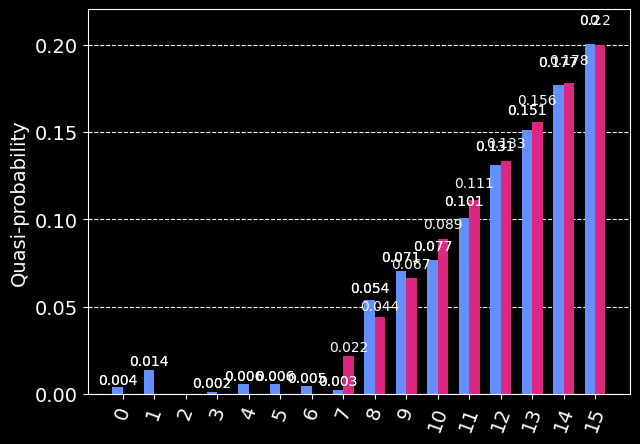

In [486]:
## PUT CODE HERE
from qiskit import Aer, transpile
from qiskit.algorithms.optimizers import SPSA, COBYLA
import matplotlib.pylab as plt
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

n_qubits = 4
rep = 2
backend = Aer.get_backend('aer_simulator_statevector')
optimizer = SPSA(maxiter=2e3)

def counts_to_distr(counts):
    """
    Convert Qiskit result counts to dict with integers as
    keys, and pseudo-probabilities as values.
    """
    n_shots = sum(counts.values())
    return {int(k, 2): v/n_shots for k, v in counts.items()}

def counts_to_amp(counts):
    """
    Convert Qiskit result counts to dict with integers as
    keys, and pseudo-probabilities as values.
    """
    sq_dict = {key: np.sqrt(value) for key, value in counts.items()}
    n_shots2 = sum(sq_dict.values())
    return {int(k, 2): np.sqrt(v)/n_shots2 for k, v in counts.items()}

def creat_target_distr(n_qubits, cross_over):
    """
    cross_over is the last zero point
    """
    n_states = 2**n_qubits
    if cross_over >= n_states:
        raise Exception("open your eyes mate")
    end = n_states-cross_over-1
    cumulant = sum(np.linspace(1, end, end)**2)
    target_distr = {}
    for i in range(n_states):
        if i < cross_over:
            target_distr[i] = 0
        else:
            target_distr[i] = (i - cross_over)**2 / cumulant
    return target_distr

def cost_func_1(params):
    """Compares the output distribution of our circuit with
    parameters `params` to the target distribution."""
    # Create circuit instance with paramters and simulate it
    qc = ansatz(params, n_qubits, rep)
    qc_t = transpile(qc, backend)
    result = backend.run(qc_t).result()
    # Get the counts for each measured state, and convert
    # those counts into a probability dict
    output_distr = counts_to_distr(result.get_counts())
    # Calculate the cost as the distance between the output
    # distribution and the target distribution
    cost = sum(
        abs(target_distr.get(i, 0) - output_distr.get(i, 0))
        for i in range(2**n_qubits)
    )
    return cost

# initialization
params = np.ones(n_qubits + rep*(2*n_qubits-1))*np.pi
target_distr = creat_target_distr(
    n_qubits=4,
    cross_over=6
)

# optimization
result = optimizer.minimize(
    fun=cost_func_1,
    x0=params)

# Obtain the output distribution using the final parameters
qc = ansatz(result.x, n_qubits=n_qubits, rep=rep)
qc_t = transpile(qc,  backend)
final_result = backend.run(qc_t, shots=1e6).result()
counts = final_result.get_counts()
output_amp = counts_to_amp(counts)
for i in range(2**n_qubits): 
    if i in output_amp:
        pass
    else:
        output_amp[i] = 0
target_amp = {i: np.sqrt(target_distr.get(i, 0)) for i in range(2**n_qubits)}
plot_histogram([output_amp, target_amp])

### **Step 3**: Simulate the hybrid quantum-classical routine to price an European call option

Use the variational QITE algorithm (heavily advised to use Qiskit primitives) to compute the evolution of the option price. Using a simualtor backend, test different time-steps, check their accuracy. Extract the price of the option at inception time, $t=0$. Think of ways to characterize the performance of the method.

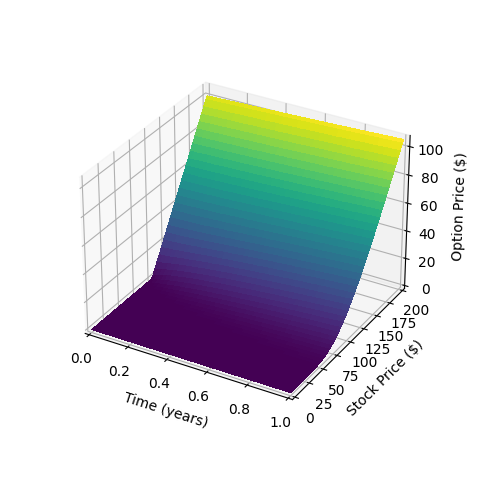

In [487]:
## PUT CODE HERE
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit.circuit.library import RealAmplitudes

from qiskit.quantum_info import SparsePauliOp

from qiskit.opflow import PauliSumOp

K = 100 # strike price
sigma = 0.4 # volatility in %
T= 1
r = 0
Smin = 50
Smax = 150
Nqubits = 4
delta = (Smax - Smin)/(2**Nqubits)



def hamiltonian(qubit_count, delta, r, sigma):

    dim = 2**qubit_count

    b = -1/2 * (1/2-r/sigma**2)**2-r/sigma**2
    print(delta)

    H = np.zeros((dim, dim))

    H[0][0] = -b*(2*delta**2)

    H[-1][-1] = -b*(2*delta**2)

    for i in range(1, dim-1):
    
        H[i][i-1] = 1

        H[i][i] = -2

        H[i][i+1] = 1

    return H*(1/(2*delta**2))

H_fact = SparsePauliOp.from_operator(hamiltonian(Nqubits, delta,  r, sigma))

pauli_op = PauliSumOp.from_list(H_fact.to_list())

6.25


In [488]:

H = hamiltonian(qubit_count=2, delta=delta, r=r, sigma=sigma)
print(H)

6.25
[[ 0.125   0.      0.      0.    ]
 [ 0.0128 -0.0256  0.0128  0.    ]
 [ 0.      0.0128 -0.0256  0.0128]
 [ 0.      0.      0.      0.125 ]]


In [489]:
from qiskit.algorithms import TimeEvolutionProblem, VarQITE
from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

param_vec = ParameterVector('θ', length=n_qubits + rep*(2*n_qubits-1))

observable = pauli_op

qc = ansatz_without(param_vec, n_qubits=n_qubits, rep=rep)

time = 5
num_step = 2
evolution_problem = TimeEvolutionProblem(observable, time=sigma**2*time)
var_qite = VarQITE(
    ansatz=qc,
    initial_parameters=result.x,
    num_timesteps=num_step*time,
)
evolution_result = var_qite.evolve(evolution_problem)

In [493]:
import matplotlib.pyplot as plt

amp = counts_to_amp(counts)
for i in range(2**n_qubits): 
        if i in amp:
            pass
        else:
            amp[i] = 0
time_evolve = np.array([amp[key] for key in sorted(amp)], ndmin=2).T
params_step = evolution_result.parameter_values
for i in range(1, len(params_step)):
    qc = ansatz(params=params_step[i], n_qubits=n_qubits, rep=rep)
    qc_t = transpile(qc, backend)
    result_step = backend.run(qc_t, shots=1e6).result()
    amp_step = counts_to_amp(result_step.get_counts())
    for i in range(2**n_qubits): 
        if i in amp_step:
            pass
        else:
            amp_step[i] = 0
    amp_ndarray = [amp_step[key] for key in range(2**n_qubits)]
    amp_ndarray = np.array(amp_ndarray, ndmin=2)
    time_evolve = np.append(time_evolve, amp_ndarray.T, axis=1)

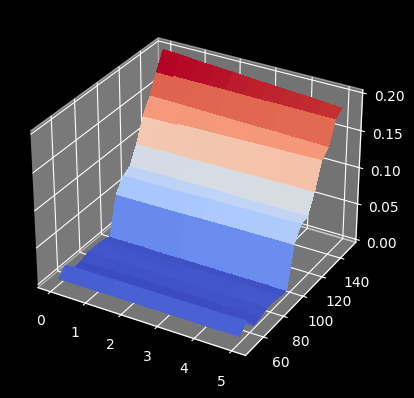

In [494]:
from matplotlib import cm

X = np.linspace(50, 150, 16)
Y = np.linspace(0, 5, time*num_step+1)
Y, X = np.meshgrid(Y, X)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Y, X, time_evolve, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

### **Bonus points**:

There are some reasonable steps to take the challenge further, think about a particular research direction or implement a feature. Here are some ideas:

- Run the hybrid quantum-classical on a QPU (optimize for given QPU connectivity). Reason whether you need state tomography, reason if possible to extract the information of interest (only the price call at the current date) with alternatives that require less expensive techniques. On a QPU or QASM  simulator, you only have access to shot-estimated probabilities.
- Reason how to extend the algorithm to other type of options or to a multi-dimensional BS model.
- Implement Montecarlo or Finite differences schemes to solve the simple option pricing exercise. A classical baseline to compare with is useful. Argue where does the hybrid quantum algortihm stand in terms of error, runtime and numerical stability or others.